# Traditional Approach

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9473684210526315


In [ ]:
%%capture
!pip install TPOT
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tpot = TPOTClassifier(generations=3, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9692307692307693

Generation 2 - Current best internal CV score: 0.9692307692307693

Generation 3 - Current best internal CV score: 0.9714285714285715

Best pipeline: XGBClassifier(XGBClassifier(input_matrix, learning_rate=1.0, max_depth=10, min_child_weight=13, n_estimators=100, n_jobs=1, subsample=0.5, verbosity=0), learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)


TPOTClassifier(generations=3, population_size=50, random_state=42, verbosity=2)

In [ ]:
acc = tpot.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.9736842105263158


In [ ]:
tpot.export('cancer_prediction_model.py')

# PyCaret

In [ ]:
%%capture
!pip install --upgrade pycaret

In [ ]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from pycaret.classification import *
clf = setup(data, target = 'Class variable')

,Description,Value
0,Session id,6767
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7635,0.8244,0.5503,0.7148,0.6174,0.4508,0.4617,1.1760
ridge,Ridge Classifier,0.7635,0.8266,0.5289,0.7286,0.6074,0.4448,0.4599,0.0440
lda,Linear Discriminant Analysis,0.7616,0.8268,0.5342,0.7189,0.6084,0.4426,0.4557,0.0410
nb,Naive Bayes,0.7469,0.8065,0.5942,0.6489,0.6191,0.4305,0.4322,0.0390
rf,Random Forest Classifier,0.7467,0.8033,0.5459,0.6725,0.5988,0.4174,0.4248,0.5680
qda,Quadratic Discriminant Analysis,0.7429,0.7982,0.5658,0.6513,0.6002,0.4136,0.4191,0.0730
gbc,Gradient Boosting Classifier,0.7356,0.7870,0.5778,0.6337,0.6025,0.4055,0.4079,0.2250
et,Extra Trees Classifier,0.7337,0.7808,0.4927,0.6649,0.5587,0.3761,0.3889,0.2270
ada,Ada Boost Classifier,0.7319,0.7880,0.5626,0.6353,0.5915,0.3943,0.3996,0.1890
knn,K Neighbors Classifier,0.7226,0.7388,0.5304,0.6150,0.5683,0.3666,0.3693,0.0560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

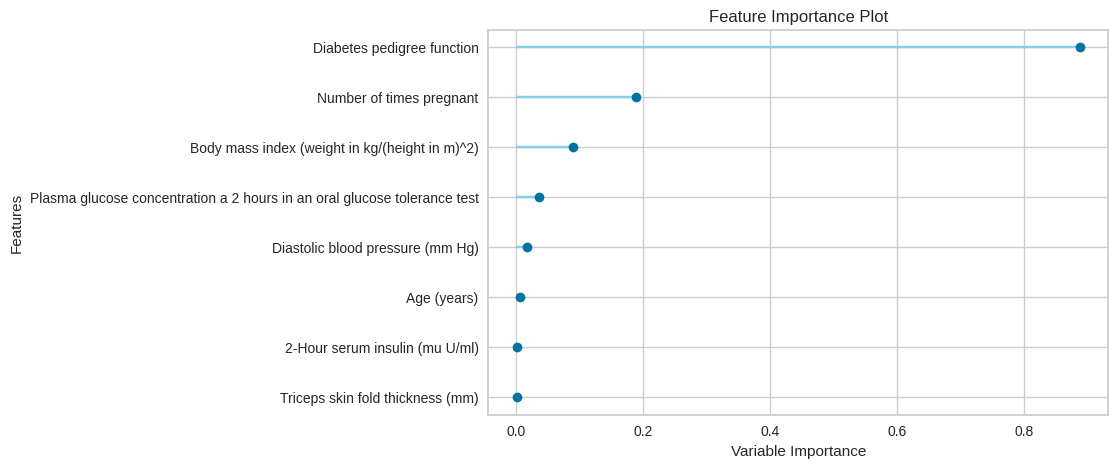

In [ ]:
plot_model(best, plot = 'feature')

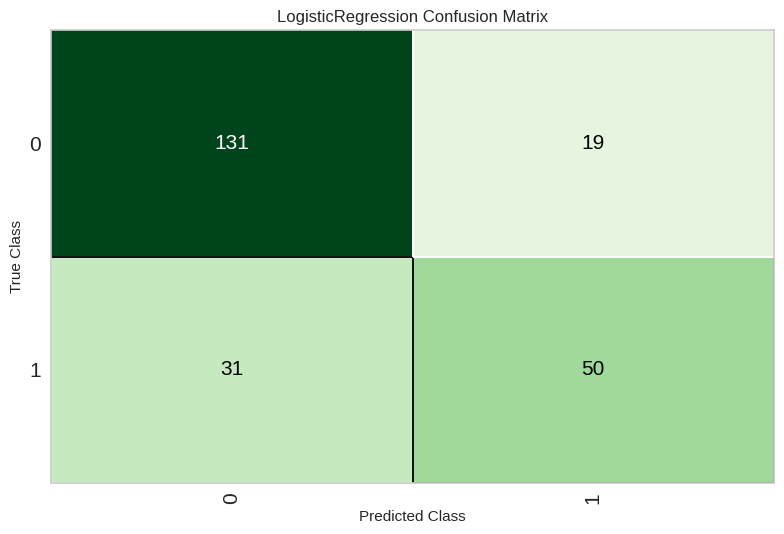

In [ ]:
plot_model(best, plot = 'confusion_matrix')

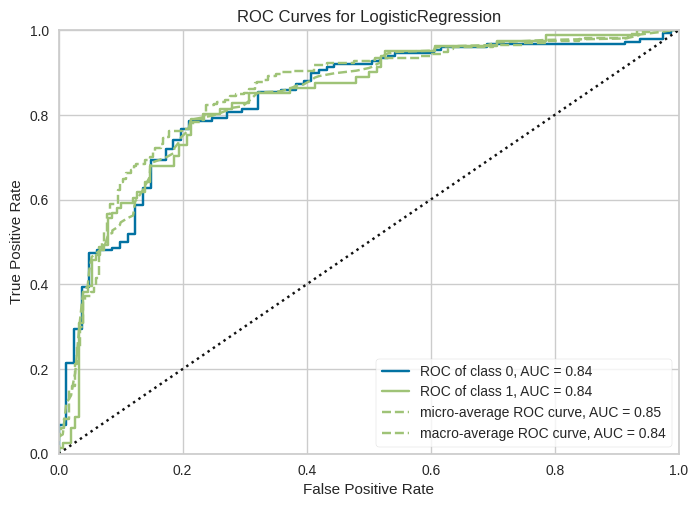

In [ ]:
plot_model(best, plot = 'auc')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
save_model(best, 'diabetes_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

In [ ]:
tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8647,0.6842,0.7647,0.7222,0.5840,0.5860
1,0.8148,0.8331,0.5263,0.9091,0.6667,0.5507,0.5902
2,0.8148,0.8602,0.6842,0.7647,0.7222,0.5840,0.5860
3,0.7778,0.8406,0.5789,0.7333,0.6471,0.4882,0.4954
4,0.7593,0.8256,0.4211,0.8000,0.5517,0.4081,0.4474
5,0.6481,0.7068,0.4737,0.5000,0.4865,0.2192,0.2194
6,0.7593,0.8075,0.5789,0.6875,0.6286,0.4524,0.4561
7,0.7170,0.7889,0.4444,0.6154,0.5161,0.3234,0.3320
8,0.7736,0.8651,0.5556,0.7143,0.6250,0.4664,0.4740


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# Deployment

In [ ]:
%%capture
!pip install gradio
!pip install --upgrade pycaret

In [ ]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from pycaret.classification import *
clf = setup(data, target = 'Class variable')

,Description,Value
0,Session id,8696
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7729,0.7943,0.6307,0.6997,0.6578,0.4893,0.4950,0.8330
rf,Random Forest Classifier,0.7728,0.8215,0.5936,0.7155,0.6445,0.4802,0.4878,0.5130
lr,Logistic Regression,0.7619,0.8323,0.5673,0.7167,0.6211,0.4522,0.4671,0.7720
ridge,Ridge Classifier,0.7618,0.8308,0.5561,0.7212,0.6147,0.4482,0.4645,0.0390
ada,Ada Boost Classifier,0.7618,0.8098,0.5889,0.6951,0.6303,0.4576,0.4664,0.1600
lda,Linear Discriminant Analysis,0.7618,0.8307,0.5614,0.7193,0.6178,0.4500,0.4655,0.0430
et,Extra Trees Classifier,0.7597,0.8093,0.5614,0.7202,0.6198,0.4486,0.4639,0.2150
nb,Naive Bayes,0.7560,0.8097,0.6190,0.6673,0.6354,0.4537,0.4593,0.0430
xgboost,Extreme Gradient Boosting,0.7469,0.7881,0.5939,0.6605,0.6183,0.4313,0.4377,0.1010
gbc,Gradient Boosting Classifier,0.7413,0.8222,0.5722,0.6626,0.6032,0.4147,0.4244,0.2070


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fafb142a737a8b8535.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
